## 10월 17일 화요일 연습문제

> 당뇨병 데이터셋 분류
- 2번~769번까지 데이터 중 다음의 기준으로 분류
- train : 2번~601번까지
- test : 602번~769번까지

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [90]:
total=pd.read_csv('diabetes.csv')
total

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [91]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [92]:
total.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [93]:
total.Insulin.value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [94]:
total.Glucose.value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [95]:
total.Insulin.median()

30.5

In [96]:
total.Insulin.mean()

79.79947916666667

In [97]:
total.loc[total.Insulin==0, 'Insulin']=total.Insulin.mean()

In [98]:
total.Insulin.value_counts()

79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
             ... 
73.000000       1
171.000000      1
255.000000      1
52.000000       1
112.000000      1
Name: Insulin, Length: 186, dtype: int64

In [99]:
total.Glucose.median()

117.0

In [100]:
total.loc[total.Glucose==0, 'Glucose']=total.Glucose.median()

In [101]:
total_c=total.corr()
total_c

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.141282,-0.081672,-0.018082,0.017683,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.158332,0.074455,0.397017,0.235035,0.137327,0.266909,0.492782
BloodPressure,0.141282,0.158332,1.000000,0.207371,0.074858,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.074455,0.207371,1.000000,0.304189,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.018082,0.397017,0.074858,0.304189,1.000000,0.189337,0.157806,0.038652,0.179185
BMI,0.017683,0.235035,0.281805,0.392573,0.189337,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137327,0.041265,0.183928,0.157806,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.239528,-0.113970,0.038652,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.065068,0.074752,0.179185,0.292695,0.173844,0.238356,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

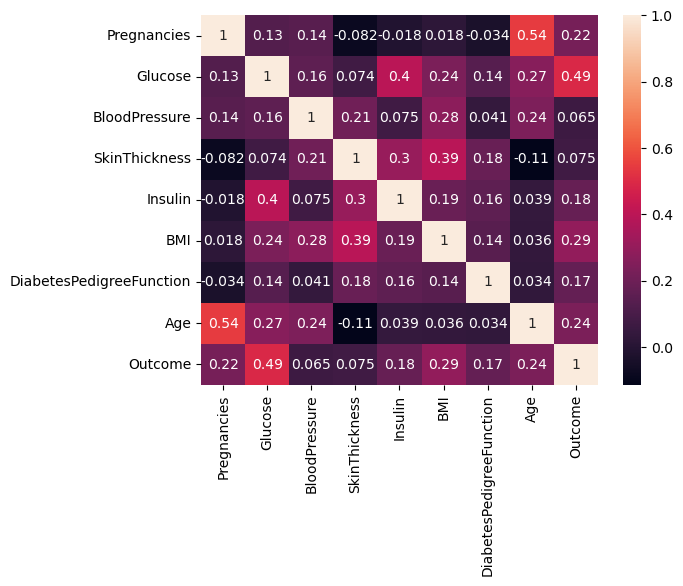

In [102]:
sns.heatmap(total_c, annot=True)
plt.show

In [103]:
total

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79.799479,33.6,0.627,50,1
1,1,85,66,29,79.799479,26.6,0.351,31,0
2,8,183,64,0,79.799479,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,79.799479,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,79.799479,30.1,0.349,47,1


In [104]:
pd.qcut(total.Glucose, 5)

0      (147.0, 199.0]
1      (43.999, 95.0]
2      (147.0, 199.0]
3      (43.999, 95.0]
4      (125.0, 147.0]
            ...      
763     (95.0, 109.0]
764    (109.0, 125.0]
765    (109.0, 125.0]
766    (125.0, 147.0]
767    (43.999, 95.0]
Name: Glucose, Length: 768, dtype: category
Categories (5, interval[float64, right]): [(43.999, 95.0] < (95.0, 109.0] < (109.0, 125.0] < (125.0, 147.0] < (147.0, 199.0]]

In [105]:
pd.qcut(total.Glucose, 5).value_counts()

(109.0, 125.0]    162
(43.999, 95.0]    155
(95.0, 109.0]     154
(125.0, 147.0]    149
(147.0, 199.0]    148
Name: Glucose, dtype: int64

In [106]:
total['Glucose']=pd.qcut(total.Glucose, 5, labels=False)

In [107]:
total['Age']=pd.qcut(total.Age, 5, labels=False)

In [108]:
total['Pregnancies']=pd.qcut(total.Pregnancies, 5, labels=False)

In [109]:
total.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,1.746094,1.97526,69.105469,20.536458,118.660163,31.992578,0.471876,1.925781,0.348958
std,1.482399,1.40521,19.355807,15.952218,93.080358,7.884160,0.331329,1.445566,0.476951
min,0.000000,0.00000,0.000000,0.000000,14.000000,0.000000,0.078000,0.000000,0.000000
25%,0.000000,1.00000,62.000000,0.000000,79.799479,27.300000,0.243750,1.000000,0.000000
50%,2.000000,2.00000,72.000000,23.000000,79.799479,32.000000,0.372500,2.000000,0.000000
75%,3.000000,3.00000,80.000000,32.000000,127.250000,36.600000,0.626250,3.000000,1.000000
max,4.000000,4.00000,122.000000,99.000000,846.000000,67.100000,2.420000,4.000000,1.000000


In [112]:
train=total[:601]
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,4,72,35,79.799479,33.6,0.627,4,1
1,0,0,66,29,79.799479,26.6,0.351,2,0
2,4,4,64,0,79.799479,23.3,0.672,2,1
3,0,0,66,23,94.000000,28.1,0.167,0,0
4,0,3,40,35,168.000000,43.1,2.288,2,1
...,...,...,...,...,...,...,...,...,...
596,0,0,76,0,79.799479,45.3,0.194,4,0
597,0,0,24,19,25.000000,27.8,0.559,0,0
598,0,4,74,0,79.799479,36.8,0.088,3,1
599,0,1,38,18,120.000000,23.1,0.407,1,0


In [113]:
xtrain=train.drop('Outcome', axis=1)
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,4,72,35,79.799479,33.6,0.627,4
1,0,0,66,29,79.799479,26.6,0.351,2
2,4,4,64,0,79.799479,23.3,0.672,2
3,0,0,66,23,94.000000,28.1,0.167,0
4,0,3,40,35,168.000000,43.1,2.288,2
...,...,...,...,...,...,...,...,...
596,0,0,76,0,79.799479,45.3,0.194,4
597,0,0,24,19,25.000000,27.8,0.559,0
598,0,4,74,0,79.799479,36.8,0.088,3
599,0,1,38,18,120.000000,23.1,0.407,1


In [114]:
ytrain=train.Outcome
ytrain

0      1
1      0
2      1
3      0
4      1
      ..
596    0
597    0
598    1
599    0
600    0
Name: Outcome, Length: 601, dtype: int64

In [115]:
xtest=total[601:].drop('Outcome', axis=1)
xtest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
601,3,1,0,0,79.799479,23.7,0.190,2
602,0,2,74,36,79.799479,27.8,0.100,2
603,3,4,78,29,126.000000,35.2,0.692,4
604,2,4,0,0,79.799479,28.4,0.212,3
605,0,2,60,32,79.799479,35.8,0.514,0
...,...,...,...,...,...,...,...,...
763,4,1,76,48,180.000000,32.9,0.171,4
764,1,2,70,27,79.799479,36.8,0.340,1
765,3,2,72,23,112.000000,26.2,0.245,2
766,0,3,60,0,79.799479,30.1,0.349,4


In [116]:
scaler = StandardScaler()
scaler.fit(xtrain) 

StandardScaler()

In [117]:
xtrain = scaler.transform(xtrain)

In [118]:
xtest = scaler.transform(xtest)

In [119]:
clf = KNeighborsClassifier()

In [120]:
params = {'n_neighbors' : [3,5,7,9,11,13,15,17,19]}
gs = GridSearchCV(clf, param_grid=params, cv=5, scoring='roc_auc')

In [121]:
gs.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='roc_auc')

In [122]:
print(gs.best_score_)

0.8052102146421382


In [123]:
print(gs.best_estimator_)

KNeighborsClassifier(n_neighbors=11)


In [124]:
pred = gs.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(total[601:].Outcome, pred)

0.7544910179640718